In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm # OLS module for linear regression
from ising import *
from graph_utils import *

/var/folders/vk/kftm8379123bsmwrdp8l0xr00000gn/T/ipykernel_2414/3208849690.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Ising on Barabasi - Albert Networks

In [24]:
num_nodes = 400
m = 10
mean_field_temperature = (m / 2) * np.log(num_nodes)
print(mean_field_temperature)
G = nx.barabasi_albert_graph(num_nodes, m)
a = get_dense_adj_matrix(G)

29.957322735539908


## Investigation of the relaxation process at fixed temperature

Preliminary step necessary to undersand how many equilibration steps are needed

In [ ]:
frac_temp = [0.4]
#frac_temp = [0.2, 0.4, 0.6, 0.8, 1.2, 1.4]
trial_temps = [f * mean_field_temperature for f in frac_temp]
n_step = 3000
for chosen_temp in trial_temps:
    initial_state, final_state, df = simulate_ising_fixed_temp(adjacency_matrix= a, T = chosen_temp, num_steps= n_step)
    df.to_csv(f"outputs_csv/BA_results_num_nodes_{num_nodes}_temp_{chosen_temp:.2f}_steps_{n_step}.csv")

In [ ]:
# Single Plot
num_nodes = 400
m = 1
mean_field_temperature = (m / 2) * np.log(num_nodes)
temp = 1.50
frac = temp / mean_field_temperature
fig, (ax1, ax2) = plt.subplots(nrows= 1, ncols= 2, figsize = (7, 3))
plt.subplots_adjust(hspace= 0.4, wspace = 0.4)
df = pd.read_csv("BA_results_num_nodes_400_temp_1.50.csv")
ax1.plot(df['n_step'], np.abs(df['average_magnetization']))
ax1.set_xlabel("time step")
ax1.set_ylabel("abs(magnetization)")
ax1.grid()
ax2.plot(df['n_step'], df['energy'])
ax2.set_xlabel("time step")
ax2.set_ylabel(r"energy E")
ax2.grid()
invisible_line = plt.Line2D([], [], linestyle="none", label=fr'$T = {frac}\,T_C$')
ax2.legend(handles=[invisible_line], labels=[invisible_line.get_label()])

In [ ]:
#Aggregated Plot
num_nodes = 400
m = 1
mean_field_temperature = (m / 2) * np.log(num_nodes)
print(mean_field_temperature)

plot_frac = np.array([0.4, 0.6, 0.8])
plot_temp = plot_frac * mean_field_temperature
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows= 3, ncols= 2, figsize = (7,9))
plt.subplots_adjust(hspace= 0.4, wspace = 0.4)

temp = 0.3
frac = temp / mean_field_temperature
df = pd.read_csv(f"outputs_csv/BA_results_num_nodes_400_temp_0.30.csv")
ax1.plot(df['n_step'], df['average_magnetization'])

x_start = 5000
x_end = 10000
mean = np.mean(df['average_magnetization'].iloc[x_start: x_end])
std =  np.std(df['average_magnetization'].iloc[x_start:x_end])          
ax1.axhline( y = mean, c = 'black')
ax1.fill_between(x=df['n_step'], y1=mean - std, y2=mean + std, color='gray', alpha=0.5)

ax1.set_xlabel("time step")
ax1.set_ylabel("magnetization")
ax1.grid()
ax2.plot(df['n_step'], df['energy'])
ax2.set_xlabel("time step")
ax2.set_ylabel(r"energy E")
ax2.grid()
invisible_line = plt.Line2D([], [], linestyle="none", label=fr'$T = {frac:.2f}\,T_C$')
ax2.legend(handles=[invisible_line], labels=[invisible_line.get_label()])


temp = 1.2
frac = temp / mean_field_temperature
df = pd.read_csv(f"outputs_csv/BA_results_num_nodes_400_temp_1.20.csv")
ax3.plot(df['n_step'], df['average_magnetization'])
mean = np.mean(df['average_magnetization'].iloc[x_start: x_end])
std =  np.std(df['average_magnetization'].iloc[x_start:x_end])          
ax3.axhline( y = mean, c = 'black')
ax3.fill_between(x=df['n_step'], y1=mean - std, y2=mean + std, color='gray', alpha=0.5)
ax3.set_xlabel("time step")
ax3.set_ylabel("magnetization")
ax3.grid()

ax4.plot(df['n_step'], df['energy'])
ax4.set_xlabel("time step")
ax4.set_ylabel(r"energy E")
ax4.grid()
invisible_line = plt.Line2D([], [], linestyle="none", label=fr'$T = {frac:.2f}\,T_C$')
ax4.legend(handles=[invisible_line], labels=[invisible_line.get_label()])



temp = 1.8
frac = temp / mean_field_temperature
df = pd.read_csv(f"outputs_csv/BA_results_num_nodes_400_temp_1.80.csv")
ax5.plot(df['n_step'], df['average_magnetization'])

mean = np.mean(df['average_magnetization'].iloc[x_start: x_end])
std =  np.std(df['average_magnetization'].iloc[x_start:x_end])          
ax5.axhline( y = mean, c = 'black')
ax5.fill_between(x=df['n_step'], y1=mean - std, y2=mean + std, color='gray', alpha=0.5)

ax5.set_xlabel("time step")
ax5.set_ylabel("magnetization")
ax5.grid()
ax6.plot(df['n_step'], df['energy'])
ax6.set_xlabel("time step")
ax6.set_ylabel(r"energy E")
ax6.grid()
invisible_line = plt.Line2D([], [], linestyle="none", label=fr'$T = {frac:.2f}\,T_C$')
ax6.legend(handles=[invisible_line], labels=[invisible_line.get_label()])

plt.savefig(f"figures/BA_relaxation_{num_nodes}_steps_{len(df)}.pdf")

## Determination of the Critical Temperature
three methods can be used, and can be compared to improve the accuracy of the estimation:

- magnetization threshold
- curve fitting of the heat and susceptibility peaks
- calculation of the inflection point in energy function

In [25]:
T_i = 0.3 * mean_field_temperature
T_f = 1.1 * mean_field_temperature
t_points = 50
eq_steps = 1500
sw_steps = 700
"""""
simulate_ising(a,
                T_i,
                T_f,
                t_points=t_points,
                equilibration_steps=eq_steps,
                sweep_steps=sw_steps,
                filename= f"outputs_csv/BA_scaling_num_nodes_{num_nodes}_t_points_{t_points}_steps_{sw_steps}_m_{m}_ti_{T_i}_tf_{T_f}.csv")
"""""

sparsified matrix
temperature 8.987196820661971, point 1/50
saved progress in df outputs_csv/BA_scaling_num_nodes_400_t_points_50_steps_700_m_10_ti_8.987196820661971_tf_32.9530550090939.csv and current state in temp_state.txt
temperature 9.965395114067356, point 3/50
saved progress in df outputs_csv/BA_scaling_num_nodes_400_t_points_50_steps_700_m_10_ti_8.987196820661971_tf_32.9530550090939.csv and current state in temp_state.txt
temperature 10.943593407472742, point 5/50
saved progress in df outputs_csv/BA_scaling_num_nodes_400_t_points_50_steps_700_m_10_ti_8.987196820661971_tf_32.9530550090939.csv and current state in temp_state.txt
temperature 11.921791700878126, point 7/50
saved progress in df outputs_csv/BA_scaling_num_nodes_400_t_points_50_steps_700_m_10_ti_8.987196820661971_tf_32.9530550090939.csv and current state in temp_state.txt
temperature 12.89998999428351, point 9/50
saved progress in df outputs_csv/BA_scaling_num_nodes_400_t_points_50_steps_700_m_10_ti_8.987196820661971_

mean field: 29.957322735539908, replica: 28.945807879394447


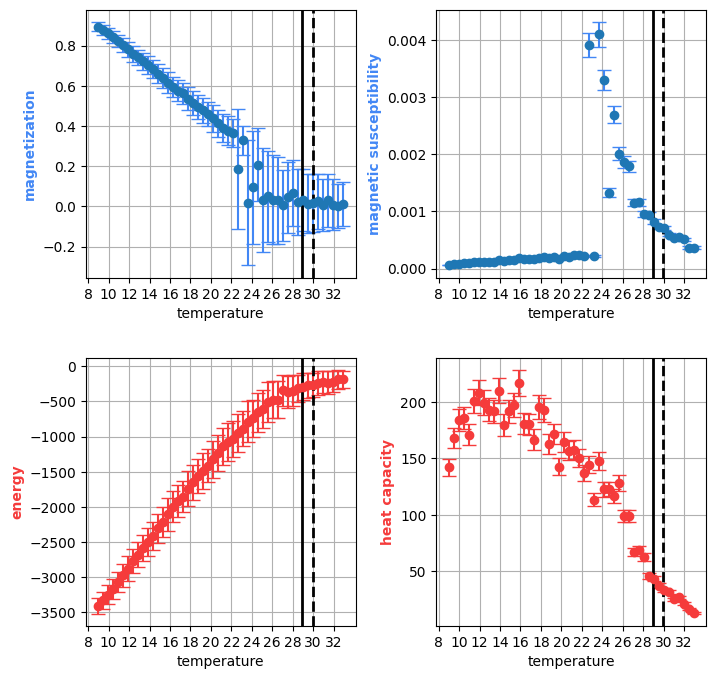

In [11]:
filename = "outputs_csv/BA_scaling_num_nodes_400_t_points_50_steps_700_m_10_ti_8.99_tf_32.95.csv"
t_points = 50
num_nodes = 400
m = 10
mean_field_temperature = (m / 2) * np.log(num_nodes)
replica_temperature =  - ( (1 / 2) * np.log(1 - 2 * (1 / mean_field_temperature)) ) ** -1
print(f"mean field: {mean_field_temperature}, replica: {replica_temperature}")
df = pd.read_csv(filename)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (8, 8))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
tick_labels = np.arange(np.floor((np.min(df['temperature']))), np.floor(np.max(df['temperature'])) + 2, 2)
formatted_tick_labels = [f"{label:.0f}" for label in tick_labels]


ax1.errorbar(df['temperature'], df['abs_magnetization'], yerr = df['std_magnetization'], fmt='o', ecolor=my_blue, capsize=5)
ax1.set_xlabel("temperature")
ax1.set_xticks(tick_labels)
ax1.set_xticklabels(formatted_tick_labels, fontsize=10)

ax1.axvline(x = mean_field_temperature, color='black', linestyle='--', linewidth=2)
ax1.axvline(x = replica_temperature, color='black', linestyle='-', linewidth=2)
ax1.set_ylabel("magnetization", color = my_blue, fontweight='bold')
ax1.grid()

ax2.errorbar(df['temperature'], df['susceptibility'], yerr = df['std_susceptibility'], fmt='o', ecolor=my_blue, capsize=5)
ax2.set_xlabel("temperature")
ax2.set_xticks(tick_labels)
ax2.set_xticklabels(formatted_tick_labels, fontsize=10)
ax2.axvline(x = mean_field_temperature, color='black', linestyle='--', linewidth=2)
ax2.axvline(x = replica_temperature, color='black', linestyle='-', linewidth=2)
ax2.set_ylabel("magnetic susceptibility", color = my_blue, fontweight='bold')
ax2.grid()

ax3.errorbar(df['temperature'], df['energy'], yerr = df['std_energy'], fmt='o', color = my_red, ecolor=my_red, capsize=5)
ax3.set_xlabel("temperature")
ax3.set_xticks(tick_labels)
ax3.set_xticklabels(formatted_tick_labels, fontsize=10)
ax3.axvline(x = mean_field_temperature, color='black', linestyle='--', linewidth=2)
ax3.axvline(x = replica_temperature, color='black', linestyle='-', linewidth=2)
ax3.set_ylabel("energy", color = my_red, fontweight='bold')
ax3.grid()

ax4.errorbar(df['temperature'], df['heat'], yerr = df['std_heat'], fmt='o', color = my_red, ecolor= my_red, capsize=5)
ax4.set_xlabel("temperature")
ax4.set_xticks(tick_labels)
ax4.set_xticklabels(formatted_tick_labels, fontsize=10)
ax4.axvline(x = mean_field_temperature, color='black', linestyle='--', linewidth=2)
ax4.axvline(x = replica_temperature, color='black', linestyle='-', linewidth=2)
ax4.set_ylabel("heat capacity", color = my_red, fontweight='bold')
ax4.grid()
plt.savefig(f"figures/BA_scaling_num_nodes_400_t_points_50_steps_700_m_10_ti_8.99_tf_32.95.pdf")

## Scaling of the critical temperature with m

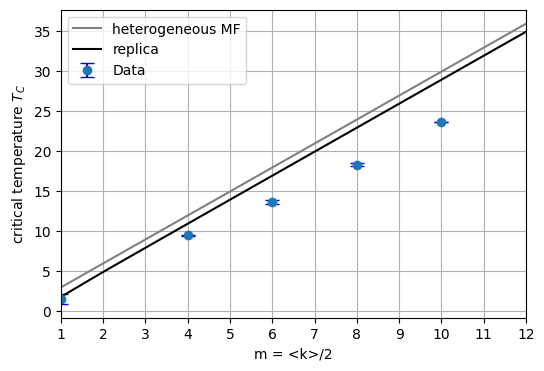

In [22]:
df1 = pd.read_csv("outputs_csv/BA_scaling_num_nodes_400_t_points_100_steps_5000_m_1.csv")
df4 = pd.read_csv("outputs_csv/BA_scaling_num_nodes_400_t_points_50_steps_2000_m_4_ti_5.99_tf_14.38.csv")
df6 = pd.read_csv("outputs_csv/BA_scaling_num_nodes_400_t_points_50_steps_1000_m_6_ti_10.78_tf_21.57.csv")
df8 = pd.read_csv("outputs_csv/BA_scaling_num_nodes_400_t_points_50_steps_1000_m_8_ti_7.19_tf_26.36.csv")
df10 = pd.read_csv("outputs_csv/BA_scaling_num_nodes_400_t_points_50_steps_700_m_10_ti_8.99_tf_32.95.csv")

dfs = [df1, df4, df6, df8, df10]

num_nodes = 400
m_values = [1, 4, 6, 8, 10]

t_estimates = [estimate_temperature(df)[0] for df in dfs]
t_std = [estimate_temperature(df)[1] for df in dfs]


fig, ax = plt.subplots(figsize = (6,4))
ax.errorbar(m_values, t_estimates, yerr= t_std, fmt='o', ecolor='b', capsize=5 , label = "Data")
x_values = range(1, 13)
mean_field_temperatures = [(m / 2) * np.log(num_nodes) for m in x_values]
replica_temperatures = [ - ( (1 / 2) * np.log(1 - 2 * (1 / mean_field_temperatures[i])) ) ** -1  for i, m in enumerate(x_values)]
ax.plot(x_values, mean_field_temperatures, label=f'heterogeneous MF', color='grey')
ax.plot(x_values, replica_temperatures, label=f'replica', color='black')
ax.grid()
ax.set_xlim([1,12])
ax.set_xlabel("m = <k>/2")
ax.set_ylabel(r"critical temperature $T_C$")
ax.set_xticks(x_values)
ax.set_xticklabels(f"{x:.0f}" for x in x_values)
ax.legend()

plt.savefig("figures/BA_temperatures.pdf")